In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

['./full_exposure/data/result_beta_0.5_sigma_0.0.txt', './full_exposure/data/result_beta_0.5_sigma_0.02.txt'] etc. (1275 files) 



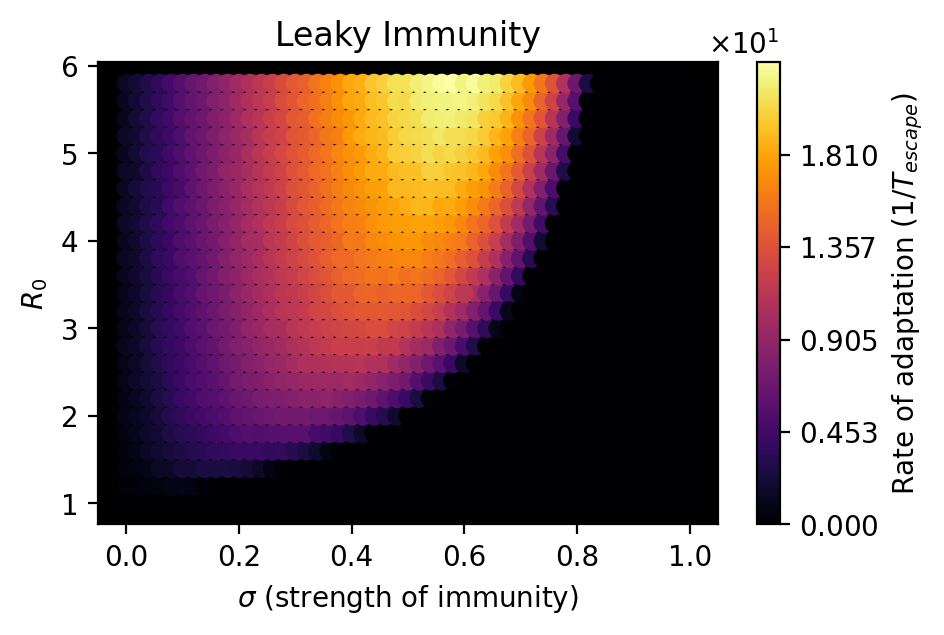

In [2]:
# Define results files (manually):
resfiles = glob.glob('./full_exposure/data/result_*.txt')
print(resfiles[0:2], f"etc. ({len(resfiles)} files) \n")

sigmas = []
Ts = []
betas = []
for file in resfiles:
    filename = file.split("/")[-1]
    b = np.round(float(filename.split("_")[2]),4)
    s = float(filename.split("_")[4].replace(".txt",""))
    #d = float(file.split("_")[6].replace(".txt",""))
    #print(f"beta: {b}, sigma: {s}, delta: {d}")
    f = open(file, "r")
    T = float(f.read())
    Ts.append(T)
    sigmas.append(s)
    betas.append(b)
Ts = np.array(Ts)
sigmas = np.array(sigmas)
betas = np.array(betas)

# Note: Recovery rate gamma hard-coded here:
R0s = betas/0.5

# Create a scatter plot with color coding based on Ts
plt.figure(figsize=(5, 3), dpi=200)
ax = plt.axes()
 
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("black")

scatter = plt.scatter(sigmas, R0s, c=Ts, cmap='inferno')
#scatter = plt.scatter(sigmas, betas/0.5, c=Ts, cmap='viridis')
cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(Ts), np.max(Ts)*0.2))
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'$R_0$')
plt.title('Leaky Immunity')
plt.show()


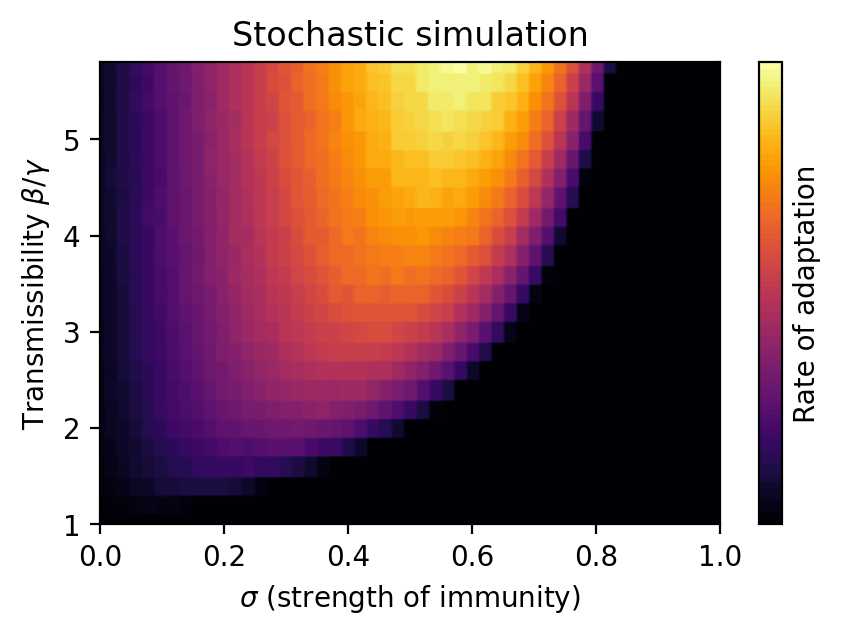

In [3]:
from scipy.interpolate import griddata
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(sigmas):max(sigmas):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured D-dimensional data
T_grid = griddata((sigmas, R0s), Ts, (sigma_grid, R0_grid), method='nearest')

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(sigma_grid, R0_grid, T_grid, levels=75, cmap='inferno')
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, 0.00701, 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(1/Ts), 0.001))
cbar = plt.colorbar(label=r'Rate of adaptation', ticks=[])
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)


plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
plt.title('Stochastic simulation')
plt.show()

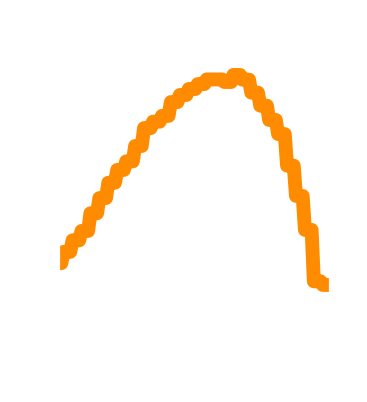

In [23]:
# Plot a net adaptation rate profile at a specific R0:

%matplotlib inline

fig, (ax) = plt.subplots(1, 1, dpi=200, figsize=(0.5*3.5,0.5*3))

# Localize the emergence rates for desired R0:
idx = 62
R0_desired = R0_grid[:,idx][0]
    
plt.plot(sigma_grid[:,idx], T_grid[:,idx], color='darkorange', linewidth=5)

ax = plt.gca()

for spine in ax.spines.values():
        spine.set_edgecolor('white')
ax.tick_params(color='white', labelcolor='white')

#plt.yticks([0 * 1e-5,0.5 * 1e-5,1 * 1e-5])
plt.xticks([0, 0.6, 1], labels=["0","0.6",""], color='white')
plt.yticks([])
plt.xlim([0,0.61])
plt.xlabel('Strength of immunity', color='white')
plt.ylabel('Net adaptation rate', color='white')
plt.title(r'$\beta/\gamma=$' + f'{np.round(R0_desired,1)}', color='white')
plt.savefig("gil_insert.svg", transparent=True)